# Onthology

## Import Data

In [10]:
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk

print(sys.version)
print(sys.executable)

# Specify the path to your XML file
xml_file_path = r'C:\dev\NLP-Sandbox\PURE\requirements-xml\0000 - cctns.xml'

# Define the namespace
namespace = {'ns': 'req_document.xsd'}

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


### Read XML into Dic

In [11]:
import utils.ParseXML as ParseXML
df = ParseXML.parse_xml_to_dataframe(xml_file_path, namespace)

display(df.head(10))

,tag,text,id,path
0,req_document,,,/req_document
1,title,,,req_document/title
2,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title
3,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title
4,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title
5,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title
6,version,1.0,,req_document/version
7,p,,1,req_document/p
8,title,INTRODUCTION,,req_document/p/title
9,text_body,The Functional Requirements Specifications (FR...,,req_document/p/text_body


## Vectorization
###  CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import utils.CleanData as CleanData

# Analysier paramether we can pass a function to clean the text
count_vect = CountVectorizer(analyzer=CleanData.clean_and_lemm_text)
X_counts = count_vect.fit_transform(df['text'])

# This will output ("how many rows where analysied", "How many unique words there are")
print(X_counts.shape)
print(count_vect.get_feature_names_out())

X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df = pd.concat([X_counts_df, pd.DataFrame(X_counts_df.sum()).T.rename(index={0: 'Total'})])

print(X_counts_df.head())

X_counts_total_df = X_counts_df.iloc[-1:].reset_index(drop=False)

# Print the updated DataFrame
print(X_counts_total_df)



AttributeError: 'list' object has no attribute 'words'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import utils.CleanData as CleanData

# Create the CountVectorizer with the specified analyzer
count_vect = CountVectorizer(analyzer=CleanData.clean_and_lemm_text)

# Fit and transform the 'text' column
X_counts = count_vect.fit_transform(df['text'])

# Get the feature names
feature_names = count_vect.get_feature_names_out()

# Create a DataFrame with the count values
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=feature_names)

# Add a row with the total counts
X_counts_total_df = pd.concat([X_counts_df, X_counts_df.sum().to_frame().T], ignore_index=True)

# Keep only the row with the total counts
X_counts_total_df = X_counts_total_df.iloc[-1:]

# Print the updated DataFrame
print(X_counts_total_df)


            -   0   1   2  3   4  5  6  7  ...   q     r     s     t    u  \
337  4588  68  16  40  20  5  18  6  1  5  ...  52  1480  1404  2380  851   

       v    w   x    y   z  
337  290  241  75  369  41  

[1 rows x 38 columns]


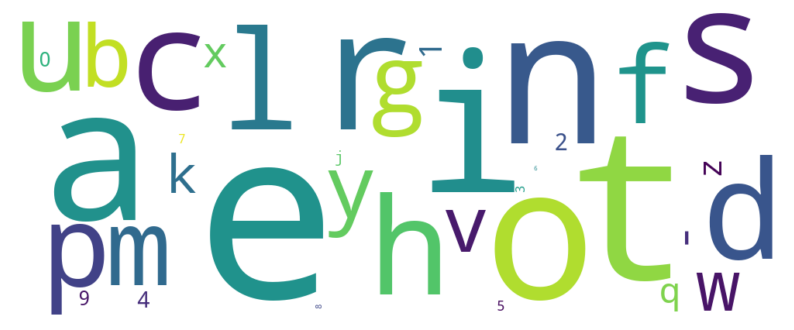

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import utils.CleanData as CleanData

# Sum the counts across all documents
total_counts = X_counts_df.sum()

# Get the top 'x' attributes
top_attributes = total_counts.nlargest(500)

# Convert to a dictionary
top_attributes_dict = top_attributes.to_dict()

# Generate a word cloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(top_attributes_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()